In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | nabire
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | kemijarvi
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | sokol
Processing Record 11 of Set 1 | tocopilla
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | tomatlan
Processing Record 15 of Set 1 | igarka
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | stare mesto
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | presidencia roque saenz pena
Processing Record 22 of Set 1 | saskylak

Processing Record 36 of Set 4 | acapulco
Processing Record 37 of Set 4 | krasnoborsk
Processing Record 38 of Set 4 | palizada
Processing Record 39 of Set 4 | kuche
City not found. Skipping...
Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | jumla
Processing Record 44 of Set 4 | kushtagi
Processing Record 45 of Set 4 | aksarka
Processing Record 46 of Set 4 | arkhangelos
City not found. Skipping...
Processing Record 47 of Set 4 | havre-saint-pierre
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | northam
Processing Record 50 of Set 4 | prado
Processing Record 1 of Set 5 | caranavi
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | muscat
Processing Record 5 of Set 5 | ambon
Processing Record 6 of Set 5 | jackson
Processing Record 7 of Set 5 | va

Processing Record 26 of Set 8 | georgetown
Processing Record 27 of Set 8 | kyabe
Processing Record 28 of Set 8 | bergen
Processing Record 29 of Set 8 | sriperumbudur
Processing Record 30 of Set 8 | komsomolskiy
Processing Record 31 of Set 8 | rocha
Processing Record 32 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 8 | hofn
Processing Record 34 of Set 8 | melission
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | bull savanna
Processing Record 37 of Set 8 | les cayes
Processing Record 38 of Set 8 | viligili
City not found. Skipping...
Processing Record 39 of Set 8 | khalkhal
Processing Record 40 of Set 8 | cape coast
Processing Record 41 of Set 8 | tarbagatay
Processing Record 42 of Set 8 | barzas
Processing Record 43 of Set 8 | pekalongan
Processing Record 44 of Set 8 | saint-donat-de-montcalm
Processing Record 45 of Set 8 | kasongo-lunda
Processing Record 46 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing 

Processing Record 17 of Set 12 | xinglongshan
Processing Record 18 of Set 12 | shizunai
Processing Record 19 of Set 12 | martinsville
Processing Record 20 of Set 12 | barbar
City not found. Skipping...
Processing Record 21 of Set 12 | nambucca heads
Processing Record 22 of Set 12 | silifke
Processing Record 23 of Set 12 | jalingo
Processing Record 24 of Set 12 | galesong
Processing Record 25 of Set 12 | sioux lookout
Processing Record 26 of Set 12 | los llanos de aridane
Processing Record 27 of Set 12 | chagda
City not found. Skipping...
Processing Record 28 of Set 12 | manta
Processing Record 29 of Set 12 | vardo
Processing Record 30 of Set 12 | laguna
Processing Record 31 of Set 12 | terrace
Processing Record 32 of Set 12 | phan thong
Processing Record 33 of Set 12 | segovia
Processing Record 34 of Set 12 | yuzhnyy
Processing Record 35 of Set 12 | ternate
Processing Record 36 of Set 12 | naftah
City not found. Skipping...
Processing Record 37 of Set 12 | waingapu
Processing Record 38

In [7]:
len(city_data)

585

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,82.99,78,75,6.93,US,2020-10-19 20:32:21
1,Punta Arenas,-53.15,-70.92,44.60,65,40,36.91,CL,2020-10-19 20:35:47
2,Nabire,-3.37,135.48,75.65,85,100,2.77,ID,2020-10-19 20:35:47
3,Lompoc,34.64,-120.46,68.00,77,1,13.87,US,2020-10-19 20:35:47
4,Namibe,-15.20,12.15,70.18,72,20,2.59,AO,2020-10-19 20:35:45
5,Ancud,-41.87,-73.82,51.80,50,75,5.82,CL,2020-10-19 20:35:47
6,Vaini,-21.20,-175.20,71.60,78,20,11.41,TO,2020-10-19 20:35:47
7,Kemijarvi,66.71,27.43,24.98,98,81,6.17,FI,2020-10-19 20:35:48
8,Qaanaaq,77.48,-69.36,29.88,86,53,10.94,GL,2020-10-19 20:35:48
9,Sokol,59.46,40.12,31.87,98,85,4.94,RU,2020-10-19 20:35:48


In [9]:
new_column_order=["City",'Country','Date','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-10-19 20:32:21,22.08,-159.32,82.99,78,75,6.93
1,Punta Arenas,CL,2020-10-19 20:35:47,-53.15,-70.92,44.60,65,40,36.91
2,Nabire,ID,2020-10-19 20:35:47,-3.37,135.48,75.65,85,100,2.77
3,Lompoc,US,2020-10-19 20:35:47,34.64,-120.46,68.00,77,1,13.87
4,Namibe,AO,2020-10-19 20:35:45,-15.20,12.15,70.18,72,20,2.59


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/19/20'

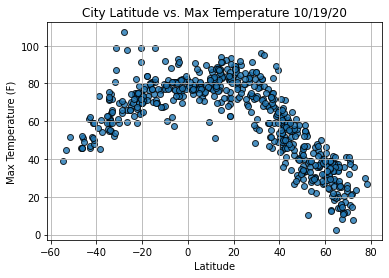

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

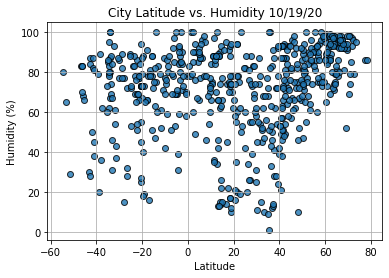

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

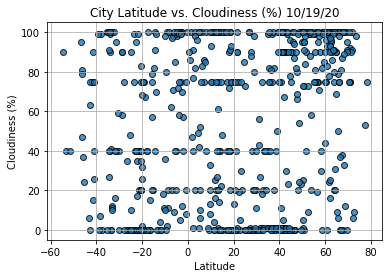

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

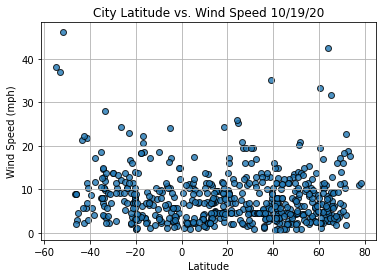

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [49]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

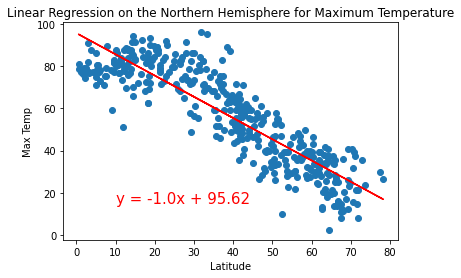

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,15))

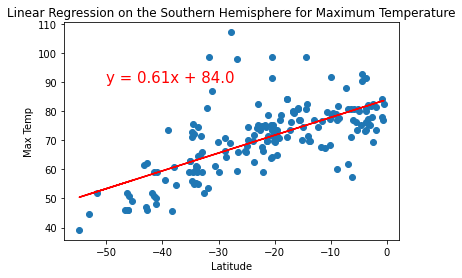

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

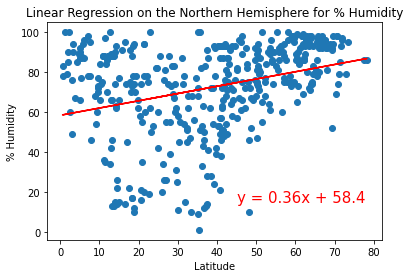

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,15))

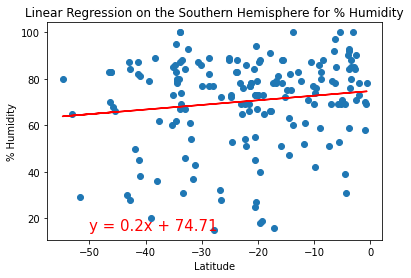

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

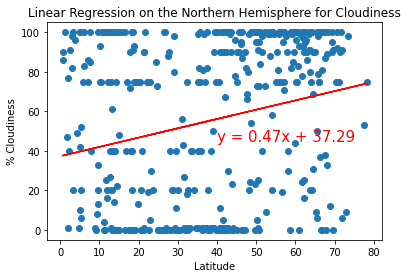

In [71]:
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness', (40,45))

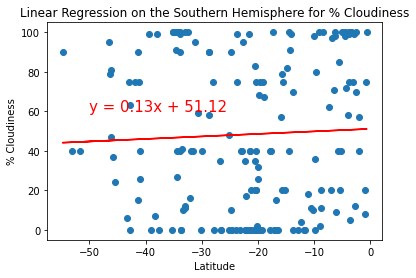

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

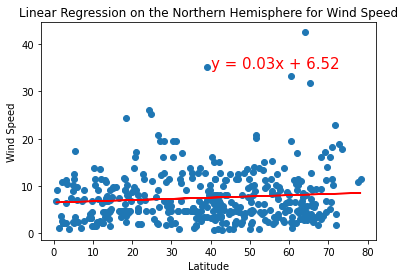

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))


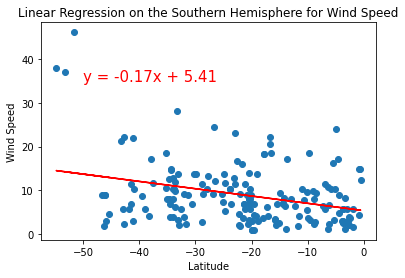

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))